<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston Housing Prices
El dataset contiene 506 observaciones de 14 variables y precios de venta de propiedades en la ciudad de Boston. El objetivo es conocer la influencia de cada variable y elaborar un modelo que prediga precios de venta.

Features:

* crim: Per capita crime rate by town.

* zn: Proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: Proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: Nitrogen oxides concentration (parts per 10 million).

* rm: Average number of rooms per dwelling.

* age: Proportion of owner-occupied units built prior to 1940.

* dis: Weighted mean of distances to five Boston employment centres.

* rad: Index of accessibility to radial highways.

* tax: Full-value property-tax rate per \$10,000.

* ptratio: Pupil-teacher ratio by town.

* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat: Lower status of the population (percent).

* medv: Median value of owner-occupied homes in \$1000s.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Muestro los histogramas de las caracteristicas:

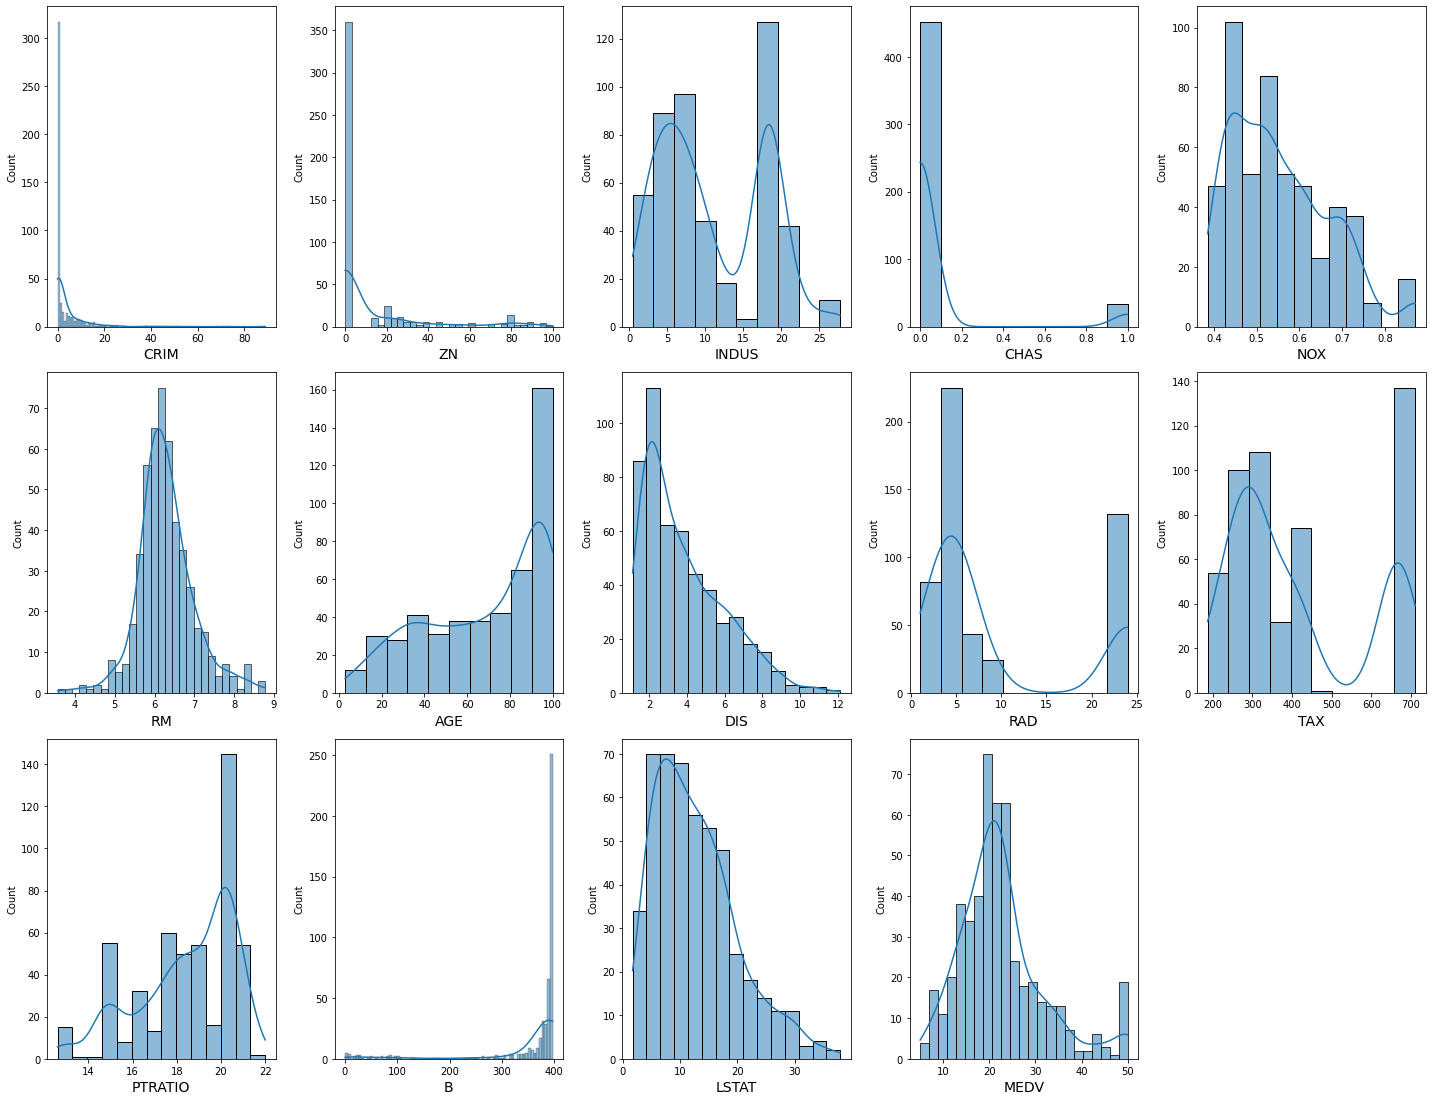

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 20))
i=0

for column in df:  
    i+=1   
    if i <= 14:
        ax = plt.subplot(4, 5, i)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column, fontsize = 14)
       
    
    
plt.tight_layout()
plt.show()

Elimino los datos con caracteristicas vacias (Otra opcion es reemplazarlas por la media)

In [ ]:
print ("Datos sin filtrar: ",df.shape)
df_filt = df.dropna()
print ("Datos filtrados (Dataframe inicial): ",df_filt.shape)

Datos sin filtrar:  (506, 14)
Datos filtrados (Dataframe inicial):  (394, 14)


Veo si hay correlacion entre caracteristicas:

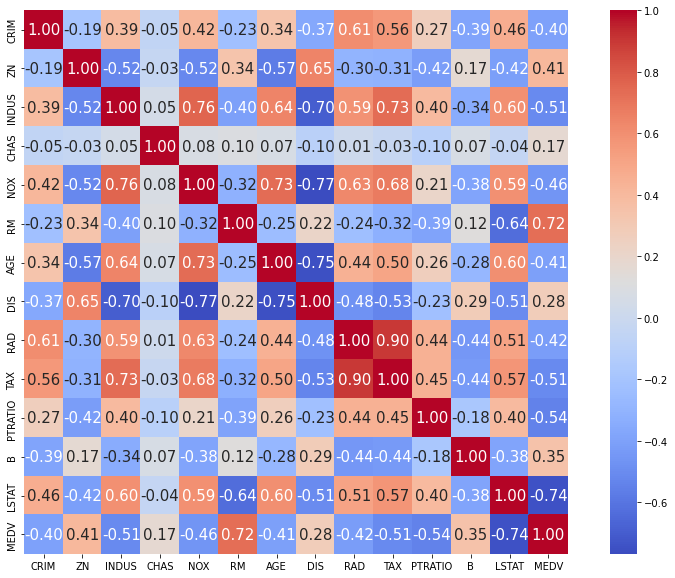

In [ ]:
corr = df_filt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Se puede ver que hay correlacion entre TAX y RAD. Por esto se debe eliminar una de ellas:

In [ ]:
df_filt.drop(columns = 'RAD', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Escalo los datos para ayudar al entrenamiento

In [ ]:
from sklearn.preprocessing import scale
y = df_filt['MEDV'] #Target 
x = df_filt.drop(columns = 'MEDV', axis = 1) #Specs

x = scale(x)   
y = scale(y) 

Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Creo y entreno el modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()    # Cargar el tipo de modelo a usar
modelo.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

RandomForestRegressor()

Obtengo el score de la red

In [ ]:
score1 = modelo.score(xtest, ytest)    
print("Score:", score1)
print()

Score: 0.9207709385188949



Testear

In [ ]:
ypred = modelo.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

Mostrar los resultados en un gráfico comparativo

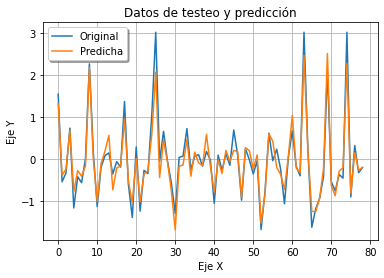

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Original")
plt.plot(x_ax, ypred, label="Predicha")
plt.title("Datos de testeo y predicción")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Se puede observar que el modelo predice bien el precio de las viviendas. Ahora, voy a probar entrenar al modelo con regresion lineal para ver la comparativa entre ambos


In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()    # Cargar el tipo de modelo a usar
modelo.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

LinearRegression()

In [ ]:
score1 = modelo.score(xtest, ytest)    
print("Score:", score1)
print()

Score: 0.8074955342061697



In [ ]:
ypred = modelo.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

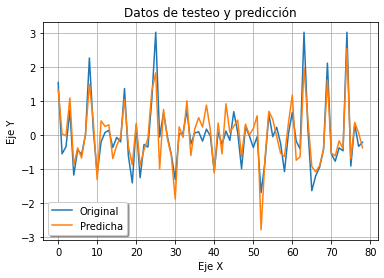

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Original")
plt.plot(x_ax, ypred, label="Predicha")
plt.title("Datos de testeo y predicción")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Se puede ver que ambos modelos predicen bien el precio, quiza el Random Forest lo haga un poco mejor